In [8]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import PlaintextCorpusReader
from collections import Counter
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt


In [9]:
plt.rcParams['savefig.transparent'] = True

In [10]:
corpus_root = 'Imagist Poets'  # Replace with your actual path
file_pattern = r'.*\.txt'  # Match all files ending in .txt
# Create the corpus
Imagism_poets_corpus = PlaintextCorpusReader(corpus_root, file_pattern)
# Output the list of files in the corpus
print(Imagism_poets_corpus.fileids())
# Combine the texts from all files in the corpus
combined_imagism = ''.join(Imagism_poets_corpus.raw(file_id) for file_id in Imagism_poets_corpus.fileids())

['1909_E_Pound_Exultations.txt', '1909_JG_Fletcher_The_Japanese_Prints.txt', '1912_A Lowell_A Dome of Many-Coloured_Glass.txt', '1912_Canzoni & Ripostes_E_Pound&TE_Hulme.txt', '1913_A Lowell_Sword Blades and Poppy Seed.txt', '1914-DES IMAGISTES.txt', '1915-SOME IMAGIST POETS.txt', '1915_JG_Fletcher_Irradiations.txt', '1915_S_Cannell_Wild Songs.txt', '1916-SOME IMAGIST POETS.txt', '1916_A Lowell_Men_Women_Rose.txt', '1916_E_Pound_Lustra.txt', '1916_H_Doolittle_SeaGarden.txt', '1917-SOME IMAGIST POETS.txt', '1917_R_Aldington.txt', '1919_E_Pound_Exultations.txt', '1921_E_Pound_Three_Portraits_and_Four_Cantos.txt', '1921_H_Doolittle_Hymen.txt', '1922_TS_Eliot_The_Waste_Land.txt', '1924_FM_Ford_Collected_Poems.txt', '1926_E_Pound_Personae.txt', '1930-New Poetry by the Imagists.txt']


In [11]:
corpus_root = 'Georgian Poetry'  # Replace with your actual path
file_pattern = r'.*\.txt'  # Match all files ending in .txt
# Create the corpus
Georgian_Poetry_corpus = PlaintextCorpusReader(corpus_root, file_pattern)
# Output the list of files in the corpus
print("The list of Georgian_Poetry:")
print(Georgian_Poetry_corpus.fileids())
combined_Georgian = ''.join(Georgian_Poetry_corpus.raw(file_id) for file_id in Georgian_Poetry_corpus.fileids())

The list of Georgian_Poetry:
['1911-1912 Georgian_Poetry.txt', '1913-1915_Georgian_Poetry.txt', '1916-1217_Georgian_Poetry.txt', '1918-1919 Georgian_Poetry.txt', '1920-1921 Georgian_Poetry.txt']


In [12]:
corpus_root = 'Objective Poetry'  # Replace with your actual path
file_pattern = r'.*\.txt'  # Match all files ending in .txt
# Create the corpus
Objective_Poetry_corpus = PlaintextCorpusReader(corpus_root, file_pattern)
# Output the list of files in the corpus
print("The list of Objective_Poetry:")
print(Objective_Poetry_corpus.fileids())
combined_Ojective = ''.join(Objective_Poetry_corpus.raw(file_id) for file_id in Objective_Poetry_corpus.fileids())

The list of Objective_Poetry:
['Basil Bunting.txt', 'CARL RAKOSI.txt', 'Charles Reznikoff.txt', 'Goegen Oppen.txt', 'LOUIS ZUKOFSKY.txt', 'Lorine Niedecker.txt', 'The FEBRUARY 1931.txt', 'WILLIAM CARLOS WILLIAMS.txt', 'other writers.txt']


In [13]:
def calculate_vocabulary_size(text):
    tokens = nltk.word_tokenize(text)
    vocabulary = set(tokens)
    return len(vocabulary)

In [14]:
imagism_vocabulary_size = calculate_vocabulary_size(combined_imagism)
georgian_vocabulary_size = calculate_vocabulary_size(combined_Georgian)
objective_vocabulary_size = calculate_vocabulary_size(combined_Ojective)

NameError: name 'nltk' is not defined

In [15]:
print(imagism_vocabulary_size)
print(georgian_vocabulary_size)
print(objective_vocabulary_size)

NameError: name 'imagism_vocabulary_size' is not defined

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize

def sentiment_proportions(text, corpus_name):
    """
    Measure the proportions of positive, negative, and neutral words in a single combined text, with lemmatization and stopwords removal, and return the counts and proportions.
    :param text: The combined text of the corpus for analysis
    :param corpus_name: The name of the corpus (used for labeling in data)
    :return: Dictionary with counts and proportions of positive, negative, and neutral words
    """
    analyzer = SentimentIntensityAnalyzer()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # Variables to store counts of positive, negative, and neutral words
    positive_count = 0
    negative_count = 0
    neutral_count = 0
    total_words = 0

    # Tokenize the combined text into sentences
    sentences = sent_tokenize(text)

    for sentence in sentences:
        words = word_tokenize(sentence)  # Tokenize sentence into words
        filtered_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words and word.isalpha()]

        for word in filtered_words:
            sentiment = analyzer.polarity_scores(word)
            if sentiment['compound'] > 0.05:
                positive_count += 1
            elif sentiment['compound'] < -0.05:
                negative_count += 1
            else:
                neutral_count += 1

    total_words = positive_count + negative_count + neutral_count

    # Proportions of positive, negative, and neutral words
    positive_proportion = positive_count / total_words if total_words != 0 else 0
    negative_proportion = negative_count / total_words if total_words != 0 else 0
    neutral_proportion = neutral_count / total_words if total_words != 0 else 0

    # Return the data
    return {
        'corpus_name': corpus_name,
        'total_words': total_words,
        'positive_count': positive_count,
        'positive_proportion': positive_proportion,
        'negative_count': negative_count,
        'negative_proportion': negative_proportion,
        'neutral_count': neutral_count,
        'neutral_proportion': neutral_proportion
    }

# Example usage:
# result = sentiment_proportions(combined_Objective, 'Objective Poetry')
# print(result)


In [17]:
sentiment_proportions(combined_Georgian, 'Objective Poetry')

{'corpus_name': 'Objective Poetry',
 'total_words': 70222,
 'positive_count': 6380,
 'positive_proportion': 0.09085471789467688,
 'negative_count': 4703,
 'negative_proportion': 0.06697331320668737,
 'neutral_count': 59139,
 'neutral_proportion': 0.8421719688986358}

In [18]:
sentiment_proportions(combined_imagism,'imagism Poetry')

{'corpus_name': 'imagism Poetry',
 'total_words': 118358,
 'positive_count': 9743,
 'positive_proportion': 0.08231805201169334,
 'negative_count': 7144,
 'negative_proportion': 0.06035924905794285,
 'neutral_count': 101471,
 'neutral_proportion': 0.8573226989303638}

In [19]:
sentiment_proportions(combined_Ojective, 'Objective Poetry')

{'corpus_name': 'Objective Poetry',
 'total_words': 26279,
 'positive_count': 1885,
 'positive_proportion': 0.07173027892994406,
 'negative_count': 1429,
 'negative_proportion': 0.054378020472620726,
 'neutral_count': 22965,
 'neutral_proportion': 0.8738917005974353}

In [20]:
def Vader_sentiment_analysis(corpus, corpus_name):
    """
    Perform sentiment analysis on the given corpus and plot a pie chart.
    :param corpus: The corpus containing the text for analysis
    :param corpus_name: The name of the corpus (used for the chart title)
    """
    analyzer = SentimentIntensityAnalyzer()

    # List to store sentiment scores
    sentiment_scores = []
    positive_scores = []
    negative_scores = []

    for file_id in corpus.fileids():
        raw_text = corpus.raw(file_id)
        sentences = sent_tokenize(raw_text)  # Perform sentiment analysis on each sentence

        # Accumulate sentiment scores
        for sentence in sentences:
            sentiment = analyzer.polarity_scores(sentence)
            sentiment_scores.append(sentiment['compound'])  # Use 'compound' score, representing overall sentiment

            sentiment = analyzer.polarity_scores(sentence)
            positive_score = sentiment['pos']
            negative_score = sentiment['neg']
            positive_scores.append(positive_score)
            negative_scores.append(negative_score)

    # Calculate the total positive sentiment score for the entire corpus
    total_positive_score = sum(positive_scores)
    total_negative_score = sum(negative_scores)

    # Calculate average positive and negative sentiment scores per sentence
    average_positive_score = total_positive_score / len(positive_scores)
    average_negative_score = total_negative_score / len(negative_scores)

    # Count the sentiment scores
    positive_count = sum(1 for score in sentiment_scores if score > 0)
    neutral_count = sum(1 for score in sentiment_scores if score == 0)
    negative_count = sum(1 for score in sentiment_scores if score < 0)

    print("Average Positive Score per Sentence:", average_positive_score)
    print("Average Negative Score per Sentence:", average_negative_score)

    # Create a pie chart
    labels = ['Positive', 'Neutral', 'Negative']
    sizes = [positive_count, neutral_count, negative_count]
    colors = ['blue', 'yellow', 'red']

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Ensure the pie chart is circular
    plt.title(f"Sentiment Analysis for {corpus_name} Corpus")
    plt.show()

Average Positive Score per Sentence: 0.08705333333333329
Average Negative Score per Sentence: 0.06979786096256702


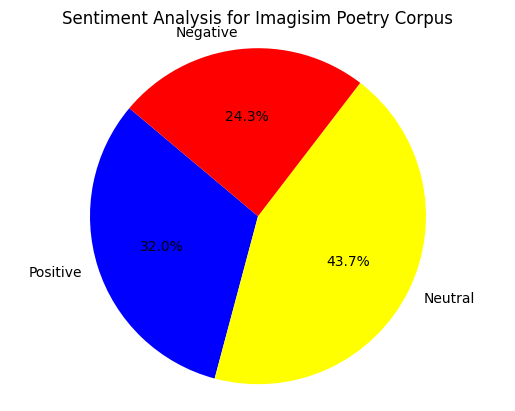

Average Positive Score per Sentence: 0.09959009089288874
Average Negative Score per Sentence: 0.0849051862413117


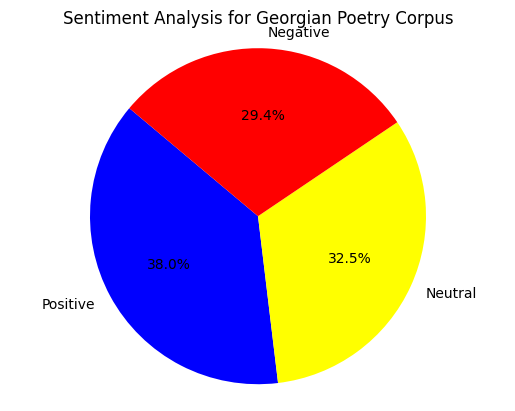

Average Positive Score per Sentence: 0.07486119186046504
Average Negative Score per Sentence: 0.06883611918604646


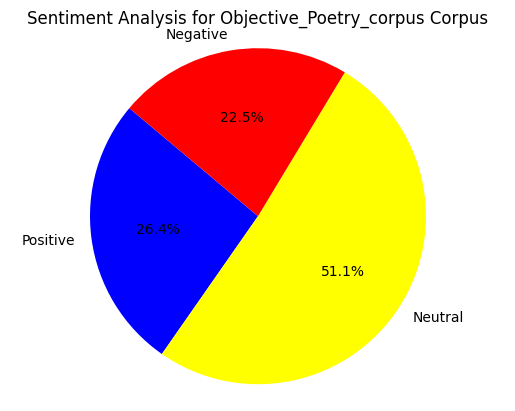

In [21]:
Vader_sentiment_analysis(Imagism_poets_corpus, "Imagisim Poetry")
Vader_sentiment_analysis(Georgian_Poetry_corpus, "Georgian Poetry")
Vader_sentiment_analysis(Objective_Poetry_corpus, "Objective_Poetry_corpus")

In [22]:
titles = ['Georgian Poetry', 'Imagism Poetry', 'Objectivism Poetry']
emotional_proportions = [15.7, 14.2, 12.6]  # Emotional = Positive + Negative
neutral_proportions = [83.3, 85.8, 87.5]  # Neutral word proportions

x = np.arange(len(titles))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Colors and embossed effect settings
emotional_color = '#ff6666'  # Soft red
neutral_color = '#cccccc'  # Grey
edge_color = '#404040'  # Darker outline for embossed effect

# Creating the bars for emotional and neutral data
rects1 = ax.bar(x - width/2, emotional_proportions, width, label='Emotional', color=emotional_color, edgecolor=edge_color, linewidth=1, zorder=3)
rects2 = ax.bar(x + width/2, neutral_proportions, width, label='Neutral', color=neutral_color, edgecolor=edge_color, linewidth=1, zorder=3)

# Adding shadows for an embossed effect
for rect in rects1 + rects2:
    ax.bar(rect.get_x(), rect.get_height(), width, color='none', edgecolor='white', lw=0.5, zorder=4)

# Adding labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Dataset')
ax.set_ylabel('Proportions (%)')
ax.set_title('Proportions of Emotional vs Neutral Words Among 3 datasets of poetry')
ax.set_xticks(x)
ax.set_xticklabels(titles)
ax.legend()

# Function to attach a label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.1f%%' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color='black')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

NameError: name 'np' is not defined

In [23]:
titles = ['Georgian Poetry', 'Imagism Poetry', 'Objectivism Poetry']
emotional_proportions = [67.5, 56.3, 47.9]  # Emotional = Positive + Negative
neutral_proportions = [32.5, 43.7, 52.1]  # Neutral word proportions

x = np.arange(len(titles))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Colors and embossed effect settings
emotional_color = '#ff6666'  # Soft red
neutral_color = '#cccccc'  # Grey
edge_color = '#404040'  # Darker outline for embossed effect

# Creating the bars for emotional and neutral data
rects1 = ax.bar(x - width / 2, emotional_proportions, width, label='Emotional', color=emotional_color,
                edgecolor=edge_color, linewidth=1, zorder=3)
rects2 = ax.bar(x + width / 2, neutral_proportions, width, label='Neutral', color=neutral_color, edgecolor=edge_color,
                linewidth=1, zorder=3)

# Adding shadows for an embossed effect
for rect in rects1 + rects2:
    ax.bar(rect.get_x(), rect.get_height(), width, color='none', edgecolor='white', lw=0.5, zorder=4)

# Adding labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Dataset')
ax.set_ylabel('Proportions (%)')
ax.set_title('Proportions of Emotional vs Neutral Sentences Among 3 datasets of poetry')
ax.set_xticks(x)
ax.set_xticklabels(titles)
ax.legend()


# Function to attach a label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.1f%%' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color='black')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

NameError: name 'np' is not defined

情绪词典：

In [ ]:
from nrclex import NRCLex


def analyze_corpus_emotion_intensity(text):
    """
    Analyze the emotional intensity of a given combined text.
    :param combined_text: The combined text of a corpus
    :return: Dictionary of emotion frequencies
    """
    emotion_analyzer = NRCLex(text)
    return emotion_analyzer.affect_frequencies

In [ ]:
georgian_emotions_frequencies=analyze_corpus_emotion_intensity(combined_Georgian)
print(georgian_emotions_frequencies)

In [ ]:
imagism_emotions_frequencies=analyze_corpus_emotion_intensity(combined_imagism)
print(imagism_emotions_frequencies)

In [ ]:
objective_emotions_frequencies=analyze_corpus_emotion_intensity(combined_Ojective)
print(objective_emotions_frequencies)

In [ ]:
import matplotlib.pyplot as plt

def plot_emotion_intensities_line_chart(imagism_data, georgian_data, objective_data):
    """
    Plot a line chart of emotion intensities for three corpora, excluding "negative" and "positive" labels.
    
    Parameters:
    imagism_data, georgian_data, objective_data (dict): Emotion frequency data for each corpus.
    """
    # Get all emotion labels except "negative" and "positive"
    emotions = sorted(set(imagism_data.keys()).union(georgian_data.keys(), objective_data.keys()) - {'negative', 'positive','anticip'})

    # Create data points for each emotion
    imagism_values = [imagism_data.get(emotion, 0) for emotion in emotions]
    georgian_values = [georgian_data.get(emotion, 0) for emotion in emotions]
    objective_values = [objective_data.get(emotion, 0) for emotion in emotions]

    # Create the line chart
    plt.figure(figsize=(14, 8))
    plt.plot(emotions, imagism_values, marker='o', linestyle='--', color='#ff7f0e', label='Georgian', linewidth=3)  # orange, dashed line
    plt.plot(emotions, georgian_values, marker='o', linestyle='-.', color='#1f77b4', label='Imagism', linewidth=3)  # blue, dash-dot line
    plt.plot(emotions, objective_values, marker='o', linestyle='-', color='#2ca02c', label='Objectivism', linewidth=3)  # green, solid line

    # Add labels and title
    plt.xlabel('Emotions', fontsize=16)
    plt.ylabel('Frequencies', fontsize=16)
    plt.title('Affects Frequencies across 3 Poetry datasets', fontsize=18)
    plt.xticks(rotation=45, fontsize=16)  # Larger font size for emotion labels
    plt.yticks(fontsize=14)
    plt.xticks(rotation=45)

    # Add legend with larger font size
    plt.legend(fontsize=16)

    # Display the plot
    plt.grid(True)
    plt.show()


In [ ]:
# 使用函数绘图
plot_emotion_intensities_line_chart(georgian_emotions_frequencies, imagism_emotions_frequencies, objective_emotions_frequencies)

In [ ]:
def extract_emotion_words(text):
    """
    分析文本，返回与各种情绪相关的词汇。
    :param combined_text: 要分析的合并后的文本。
    :return: 一个字典，键为情绪，值为相关的词汇列表。
    """
    emotion_analyzer = NRCLex(text)  # 修改变量名以避免冲突
    emotion_words = {}

    # 注意修改了循环中的变量名，使其更清晰
    for word, emotion_list in emotion_analyzer.affect_dict.items():
        for emotion in emotion_list:
            if emotion not in emotion_words:
                emotion_words[emotion] = [word]
            else:
                emotion_words[emotion].append(word)

    return emotion_words

In [ ]:
import pandas as pd
from nrclex import NRCLex

def load_emotion_intensity_lexicon(file_path):
    """从文件中加载情绪强烈度字典，返回一个字典，包含单词、情绪和对应的强度。"""
    lexicon = pd.read_csv(file_path, sep='\t', names=['word', 'emotion', 'intensity'])
    lexicon_dict = {(row['word'], row['emotion']): row['intensity'] for index, row in lexicon.iterrows()}
    return lexicon_dict

def extract_emotion_words(text, lexicon):
    """分析文本，返回与各种情绪相关的词汇的加权总得分，排除'positive', 'negative'和'anticip'情绪。"""
    emotion_analyzer = NRCLex(text)
    emotion_frequencies = emotion_analyzer.affect_frequencies
    
    excluded_emotions = ['positive', 'negative', 'anticip']
    emotion_scores = {emotion: 0 for emotion in emotion_frequencies if emotion not in excluded_emotions}

    # 遍历每个词和相关的情绪列表
    for word, emotions in emotion_analyzer.affect_dict.items():
        for emotion in emotions:
            if emotion not in excluded_emotions and (word, emotion) in lexicon:
                # 使用情绪频率乘以情绪强度得分
                emotion_scores[emotion] += emotion_frequencies[emotion] * lexicon[(word, emotion)]
    
    return emotion_scores

# 文件路径，请替换成你的实际文件路径
file_path = 'NRC-Emotion-Intensity-Lexicon-v1.txt'
lexicon = load_emotion_intensity_lexicon(file_path)



In [ ]:
average_intensity_Georgian=extract_emotion_words(combined_Georgian,lexicon)
print(average_intensity_Georgian)

In [ ]:
average_intensity_imagism=extract_emotion_words(combined_imagism,lexicon)
print(average_intensity_imagism)

In [ ]:
average_intensity_Objective=extract_emotion_words(combined_Ojective,lexicon)
print(average_intensity_Objective)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_emotion_wheel(emotions):
    # 设置花瓣颜色，可以自定义为任何你喜欢的颜色
    colors = {
        'joy': '#ffffb3',  # 更亮的黄色
        'trust': '#00b359',  # 亮绿色
        'fear': '#b3ffb3',  # 亮浅绿色
        'surprise': '#99ccff',  # 亮浅蓝色
        'sadness': '#4d88ff',  # 亮深蓝色
        'disgust': '#cc99ff',  # 亮紫色
        'anger': '#ff9999',  # 亮红色
        'anticipation': '#ffcc98'  # 亮橙色
    }

    # 计算每个花瓣的角度
    N = len(emotions)
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
    
    # 创建极坐标图
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.set_ylim(0, 30)  # 设置极坐标的半径范围为0到1

    # 绘制每个情绪的花瓣
    bars = ax.bar(theta, list(emotions.values()), width=2*np.pi/N, bottom=0.0, 
                  color=[colors[emotion] for emotion in emotions.keys()], alpha=0.75, edgecolor='black')
    
    # 设置花瓣标签
    ax.set_xticks(theta)
    ax.set_xticklabels(emotions.keys())
    ax.set_yticklabels([])  # 隐藏半径的标签
    ax.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.5)
    ax.set_xticklabels(emotions.keys(), fontweight='bold', fontsize=14)  # 加粗并放大标签
    
    # 在每个花瓣上标注数值
    for bar, value in zip(bars, emotions.values()):
        angle = bar.get_x() + bar.get_width() / 2
        distance = bar.get_height() + 0.05
        ax.text(angle, distance, f'{value:.2f}', ha='center', va='bottom', 
                fontsize=10, color='black', rotation=angle * 180 / np.pi + 90)

    plt.show()

In [ ]:
plot_emotion_wheel(average_intensity_Georgian)

In [ ]:
plot_emotion_wheel(average_intensity_imagism)

In [ ]:
plot_emotion_wheel(average_intensity_Objective)

In [ ]:
def extract_trust_words(text, lexicon):
    """分析文本，返回与'trust'情绪相关的词汇及其得分。"""
    emotion_analyzer = NRCLex(text)
    trust_words = {}
    
    # 遍历每个词和相关的情绪列表
    for word, emotions in emotion_analyzer.affect_dict.items():
        if 'trust' in emotions and (word, 'trust') in lexicon:
            trust_words[word] = lexicon[(word, 'trust')]
    
    return trust_words

In [ ]:
trust_words = extract_trust_words(combined_Ojective, lexicon)

# 打印与'trust'相关的词汇及其得分
sorted_trust_words = sorted(trust_words.items(), key=lambda item: item[1], reverse=True)
top_50_trust_words = sorted_trust_words[:50]

# 打印得分最高的前50个与'trust'相关的词汇及其得分
print("Top 50 words associated with 'trust' and their scores:")
for word, score in top_50_trust_words:
    print(f"{word}: {score}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
words, scores = zip(*top_50_trust_words)

# 设置图形大小和透明背景
plt.figure(figsize=(10, 8), facecolor='none')

# 计算条形的位置
y_pos = np.arange(len(words))

# 绘制条形图，增加条形之间的间距
bar_width = 0.4
plt.barh(y_pos, scores, color='grey', height=bar_width)

# 添加标签和标题
plt.xlabel('Trust Score')
plt.title('Top 50 Words Associated with Trust and Their Scores')

# 反转Y轴，使得最高得分在最上方
plt.gca().invert_yaxis()

# 设置图表背景透明
plt.gca().patch.set_alpha(0)
plt.gcf().patch.set_alpha(0)

# 设置Y轴刻度和标签
plt.yticks(y_pos + bar_width / 2, words)

# 显示图表
plt.show()


In [ ]:
# Combine text from all three corpora
combined_text = combined_imagism + combined_Georgian + combined_Ojective

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Initialize WordNetLemmatizer and set of English stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return tokens

# Preprocess text for each corpus
processed_imagism = preprocess_text(combined_imagism)
processed_georgian = preprocess_text(combined_Georgian)
processed_objective = preprocess_text(combined_Ojective)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

titles = ['Georgian Poetry', 'Imagism Poetry', 'Objectivism Poetry']
emotional_proportions = [15.7, 14.2, 12.6]  # Emotional = Positive + Negative
neutral_proportions = [83.3, 85.8, 87.5]  # Neutral word proportions

x = np.arange(len(titles))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Colors and embossed effect settings
emotional_color = '#ff6666'  # Soft red
neutral_color = '#cccccc'  # Grey
edge_color = '#404040'  # Darker outline for embossed effect

# Creating the bars for emotional and neutral data
rects1 = ax.bar(x - width/2, emotional_proportions, width, label='Emotional', color=emotional_color, edgecolor=edge_color, linewidth=1, zorder=3)
rects2 = ax.bar(x + width/2, neutral_proportions, width, label='Neutral', color=neutral_color, edgecolor=edge_color, linewidth=1, zorder=3)

# Adding shadows for an embossed effect
for rect in rects1 + rects2:
    ax.bar(rect.get_x(), rect.get_height(), width, color='none', edgecolor='white', lw=0.5, zorder=4)

# Adding labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Dataset')
ax.set_ylabel('Proportions (%)')
ax.set_title('Proportions of Emotional vs Neutral Words Among 3 datasets of poetry')
ax.set_xticks(x)
ax.set_xticklabels(titles)
ax.legend()

# Function to attach a label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.1f%%' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color='black')

autolabel(rects1)
autolabel(rects2)

# Remove grid and set transparent background
ax.grid(False)
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
ax.set_facecolor('none')

fig.tight_layout()
plt.savefig('/mnt/data/output_transparent_bar.png', transparent=True)
plt.show()